In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import flowjoprizm as fjp
from flowjoprizm.plot import flow_plot
from flowjoprizm.process import processFlowJo

In [3]:
# name of the folder that holds the data
name = "2025-4-8 AVNM and ketone Mac panel - ETHAN"
# ways you'd like to categorize the data
groups = ['treatment','sampletype']
# Note that these are the same name as the folders within the folder `name`.

# this is how many beads were added, for scaling
beads = 7800
# name of the beads, based on the FlowJo gate
bead_col = "beads"

# process the flowjodata
df = processFlowJo(name,
                   beads,
                   bead_col,
                   groups,
                   verbose=False)

df.head()
# Combined, there are 34 samples each. If all the rows from all .csv in
# the `sampletype` and `treatment` folder were combined separately,
# you would find 34 rows in each.

,Sample,treatment,sampletype,beads,Scaling,Live CD45+,Ly6C+,Monos,CD64-Ly6C-,CD64+,CX3CR1+,DN,CD206+,CD206+CX3CR1-
0,Specimen_001_4s.fcs,bd,SAT,222.0,35.135135,27124.324324,1932.432432,140.540541,491.891892,17743.243243,6043.243243,2424.324324,7764.864865,1335.135135
1,Specimen_001_4t.fcs,bd,VAT,126.0,61.904762,465276.190476,31447.619048,3590.476190,19561.904762,304880.952381,57819.047619,41042.857143,97438.095238,107776.190476
2,Specimen_001_5s.fcs,bd,SAT,262.0,29.770992,90146.564885,10747.328244,1071.755725,982.442748,55999.236641,10509.160305,6549.618321,33254.198473,5775.572519
3,Specimen_001_5t.fcs,bd,VAT,159.0,49.056604,355513.207547,44200.000000,3041.509434,6769.811321,208049.056604,37086.792453,23498.113208,84671.698113,63381.132075
4,Specimen_001_6s.fcs,bd,SAT,165.0,47.272727,233101.818182,31105.454545,3167.272727,1843.636364,120214.545455,24392.727273,12763.636364,74501.818182,8130.909091


  treatment variable          value
0        bd    CD64+   17743.243243
1        bd    CD64+   55999.236641
2        bd    CD64+  120214.545455
3      AVNM    CD64+   74676.521739
4      AVNM    CD64+   33459.523810
  treatment variable          value
0        bd    CD64+  304880.952381
1        bd    CD64+  208049.056604
2        bd    CD64+  222580.800000
3      AVNM    CD64+  578122.580645
4      AVNM    CD64+  268297.058824
  treatment variable         value
0        bd  CX3CR1+   6043.243243
1        bd  CX3CR1+  10509.160305
2        bd  CX3CR1+  24392.727273
3      AVNM  CX3CR1+  12615.652174
4      AVNM  CX3CR1+   8233.333333
  treatment variable         value
0        bd  CX3CR1+  57819.047619
1        bd  CX3CR1+  37086.792453
2        bd  CX3CR1+  81432.000000
3      AVNM  CX3CR1+  94019.354839
4      AVNM  CX3CR1+  41408.823529


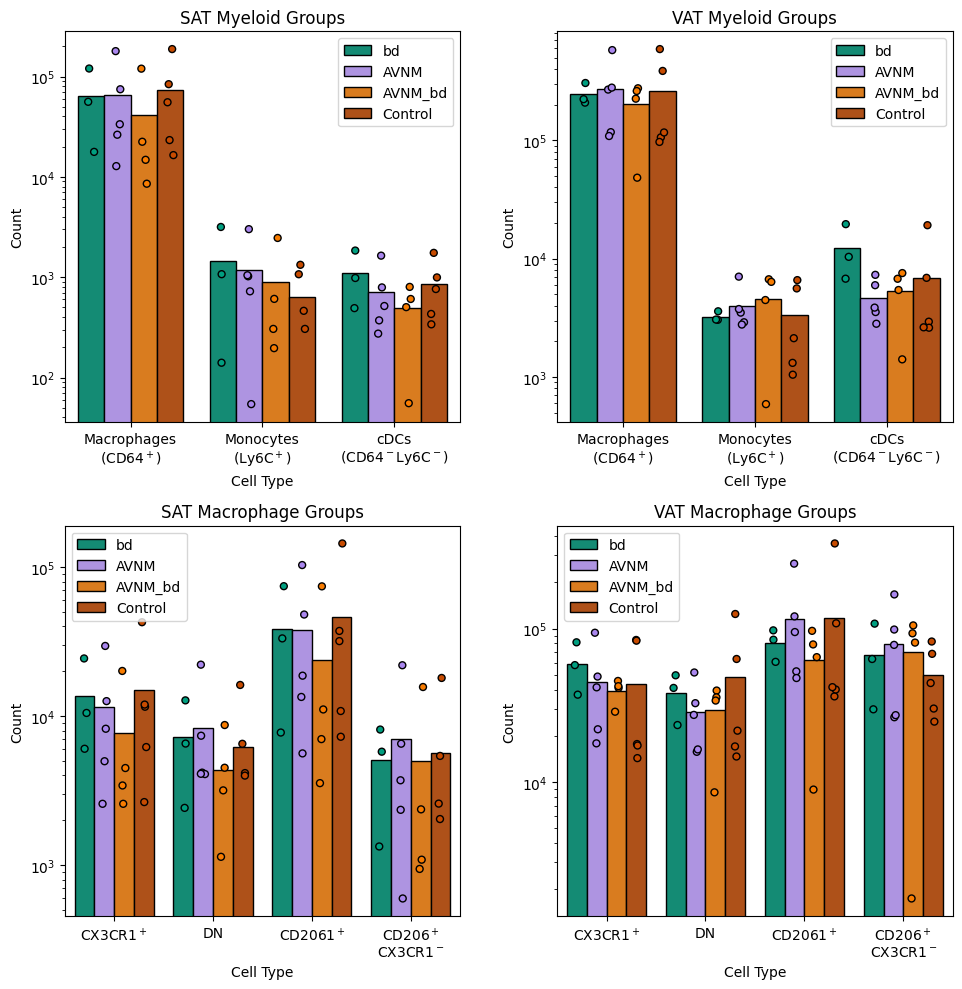

In [7]:
df_SAT = df[df.sampletype=='SAT'] # Separate SAT tissue 
df_VAT = df[df.sampletype=='VAT'] # and VAT tissue

# create a plot with 4 subfigures in a 2x2 matrix. The figure is size 10"x10".
f,ax = plt.subplots(2,2,figsize=(10,10))

# SAT myeloid cell types
flow_plot(df_SAT,
          measurement_cols=['CD64+','Monos','CD64-Ly6C-'], 
          rename=["Macrophages\n(CD64$^+$)", "Monocytes\n(Ly6C$^+$)", "cDCs\n(CD64$^-$Ly6C$^-$)"],
          # renames the columns; uses seaborn's latex comprehension to add superscript +/- (e.g. '$^+$')
          title='SAT Myeloid Groups',
          group_type='treatment',
          ax=ax[0,0],
          verbose=False,
          )

# VAT myeloid cell types
flow_plot(df_VAT,
          measurement_cols=['CD64+','Monos','CD64-Ly6C-'],
          rename=["Macrophages\n(CD64$^+$)", "Monocytes\n(Ly6C$^+$)", "cDCs\n(CD64$^-$Ly6C$^-$)"],
          title='VAT Myeloid Groups',
          group_type='treatment',
          ax=ax[0,1],
          verbose=False,
          )

# SAT macrophage types
flow_plot(df_SAT,
          measurement_cols=['CX3CR1+', 'DN', 'CD206+', 'CD206+CX3CR1-'],
          rename=['CX3CR1$^+$', 'DN', 'CD2061$^+$', 'CD206$^+$\nCX3CR1$^-$'],
          title='SAT Macrophage Groups',
          group_type='treatment',
          ax=ax[1,0],
          verbose=False,
          )

# VAT macrophage types
flow_plot(df_VAT,
          measurement_cols=['CX3CR1+', 'DN', 'CD206+', 'CD206+CX3CR1-'],
          rename=['CX3CR1$^+$', 'DN', 'CD2061$^+$', 'CD206$^+$\nCX3CR1$^-$'],
          title='VAT Macrophage Groups',
          group_type='treatment',
          ax=ax[1,1],
          verbose=False,
          )

# scaling & formatting adjustments
plt.tight_layout()
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

  treatment sampletype variable          value
0        bd        SAT    CD64+   17743.243243
1        bd        VAT    CD64+  304880.952381
2        bd        SAT    CD64+   55999.236641
3        bd        VAT    CD64+  208049.056604
4        bd        SAT    CD64+  120214.545455


/Users/ehung/Documents/labs/molofsky/flowjoprizm/flowjoprizm/plot.py:43: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='variable', y='value', hue=hues, data=melted, errorbar=None,


array(['bd', 'AVNM', 'AVNM_bd', 'Control'], dtype=object)

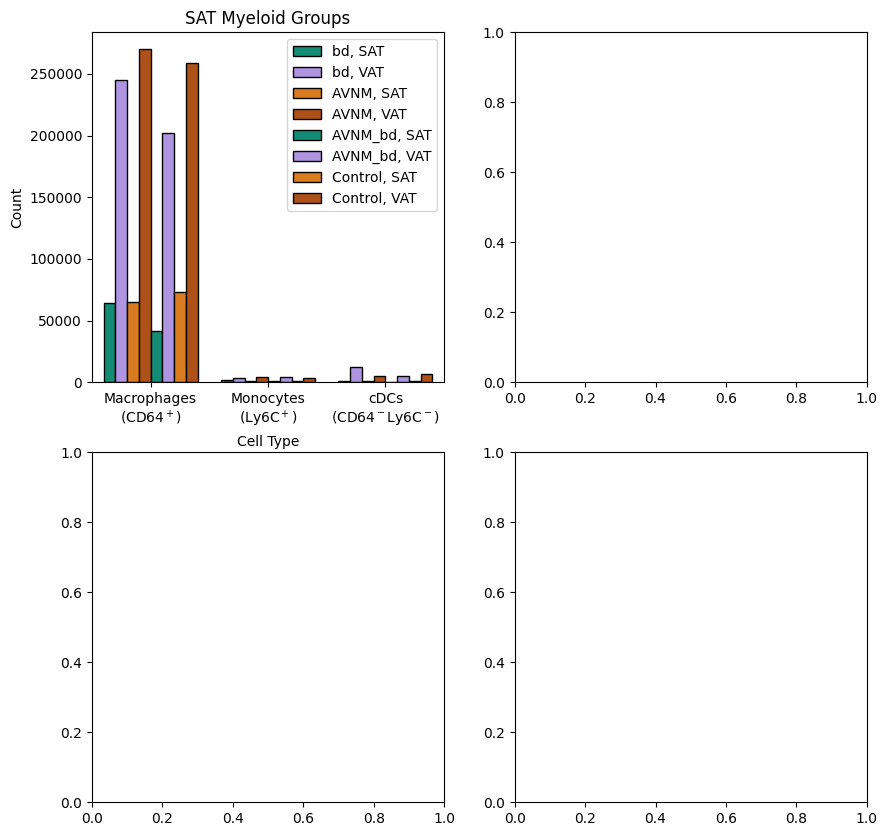

In [4]:
f,ax = plt.subplots(2,2,figsize=(10,10))

melted = flow_plot(df,
          measurement_cols=['CD64+','Monos','CD64-Ly6C-'], 
          rename=["Macrophages\n(CD64$^+$)", "Monocytes\n(Ly6C$^+$)", "cDCs\n(CD64$^-$Ly6C$^-$)"],
          # renames the columns; uses seaborn's latex comprehension to add superscript +/- (e.g. '$^+$')
          title='SAT Myeloid Groups',
          group_type='treatment',
          extra_group=['sampletype'],
          ax=ax[0,0],
          verbose=False,
          )
melted.treatment.unique()